In [3]:
import numpy as np
from keras import models
from keras import layers
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
train_data_2, val_data, train_labels_2, val_labels = train_test_split(train_data, train_labels, test_size=0.2)

In [9]:
print(train_labels.shape)
print(len(train_data_2))
print(len(val_data))
print(len(test_data))
print(len(train_labels_2))
print(len(val_labels))
print(len(test_labels))

(50000, 1)
40000
10000
10000
40000
10000
10000


In [10]:
train_data_2[0]

array([[[ 55,  19,   7],
        [ 62,  26,  14],
        [ 71,  35,  23],
        ...,
        [ 75,  17,   4],
        [ 70,  13,   1],
        [ 71,  14,   3]],

       [[ 59,  21,   8],
        [ 63,  25,  11],
        [ 70,  32,  19],
        ...,
        [ 81,  17,   4],
        [ 78,  14,   2],
        [ 80,  16,   5]],

       [[ 62,  23,   8],
        [ 61,  22,   7],
        [ 70,  31,  16],
        ...,
        [ 83,  14,   3],
        [ 82,  13,   3],
        [ 81,  13,   3]],

       ...,

       [[142,  54,  10],
        [124,  43,  12],
        [118,  38,  12],
        ...,
        [154,  45,   6],
        [146,  41,   5],
        [138,  36,   3]],

       [[149,  61,  13],
        [131,  48,  13],
        [130,  48,  14],
        ...,
        [153,  46,   7],
        [146,  40,   1],
        [149,  43,   5]],

       [[143,  56,  10],
        [123,  40,   5],
        [126,  43,   6],
        ...,
        [147,  44,   7],
        [148,  43,   3],
        [165,  58,  13]]

In [11]:
train_labels_2[:5]

array([[5],
       [0],
       [9],
       [3],
       [1]], dtype=uint8)

In [12]:
train_labels_2 = train_labels_2.reshape(-1,)
train_labels_2

array([5, 0, 9, ..., 1, 2, 7], dtype=uint8)

In [13]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [16]:
def plot_img(X, y, index): 
    plt.figure(figsize = (3,3))
    plt.imshow(train_data_2[index])
    plt.xlabel(classes[y[index]])
    plt.show()

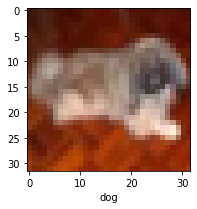

In [19]:
plot_img(train_data_2, train_labels_2, 0)

In [20]:
train_data_2 = train_data_2 / 255
test_data = test_data / 255
val_dat = val_data / 255

In [21]:
network = models.Sequential()
network.add(layers.Flatten(input_shape=(32,32,3)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))


In [22]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
train_labels_2 = to_categorical(train_labels_2)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)
test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
network.fit(train_data_2, train_labels_2, epochs=20)

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9660 - accuracy: 0.2900
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7809 - accuracy: 0.3644
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7168 - accuracy: 0.3877
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6801 - accuracy: 0.4042
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6471 - accuracy: 0.4169
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6203 - accuracy: 0.4242
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6018 - accuracy: 0.4281
Epoch 8/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5864 - accuracy: 0.4343
Epoch 9/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5738 - accuracy: 0.4419
Epoch 10/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.566

In [25]:
test_loss, test_acc = network.evaluate(val_data,  val_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 296.3037 - accuracy: 0.3643 - 393ms/epoch - 1ms/step

Test accuracy: 0.364300012588501
